In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [32]:
df = pd.read_csv("houses_to_rent_v2.csv")

### Preprocess data

In [33]:
df["floor"] = df["floor"].map(lambda x: None if x == '-' else x)  #Replace the '-' with None

In [15]:
df[:10]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,None,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


### EDA

In [34]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  8231 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
df[]

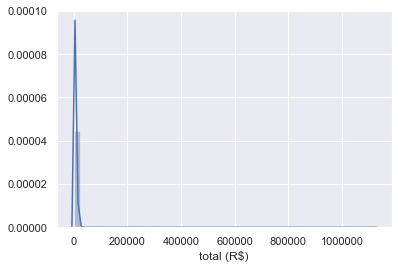

In [36]:
sns.distplot(df["total (R$)"])

In [37]:
print("Skewness: ", df["total (R$)"].skew())
print("Kurtosis: ", df["total (R$)"].kurt())

Skewness:  58.96080291866255
Kurtosis:  3926.0193052130835


In [17]:
cities = df['city'].unique()
cities

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

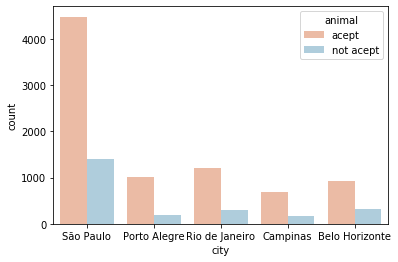

In [20]:
plt.figure()
sns.countplot(x='city', hue='animal', data=df, palette='RdBu')
plt.xticks([0,1,2,3,4], cities)
plt.show()

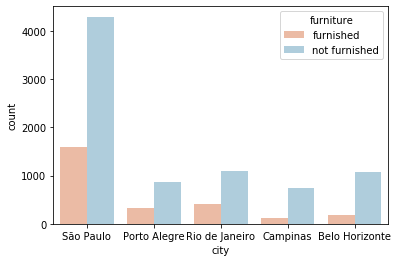

In [21]:
plt.figure()
sns.countplot(x='city', hue='furniture', data=df, palette='RdBu')
plt.xticks([0,1,2,3,4], cities)
plt.show()

### Drop first and last quarter

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

area                    126.00
rooms                     1.00
bathroom                  2.00
parking spaces            2.00
hoa (R$)               1067.50
rent amount (R$)       3470.00
property tax (R$)       337.00
fire insurance (R$)      47.00
total (R$)             4706.25
dtype: float64


In [38]:
df_drop_Q = df[df['total (R$)']<= 4706.25]

In [39]:
df_drop_Q.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000,6628.000000
mean,83.497737,2.022631,1.535757,0.947797,464.030477,1915.230386,96.674562,26.282891,2502.412492
std,166.957194,0.916180,0.790250,1.017275,395.301012,858.126941,118.260004,12.523517,1048.254394
min,11.000000,1.000000,1.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,47.000000,1.000000,1.000000,0.000000,157.750000,1200.000000,15.000000,17.000000,1637.000000
50%,66.000000,2.000000,1.000000,1.000000,417.500000,1800.000000,66.000000,24.000000,2366.000000
75%,95.000000,3.000000,2.000000,1.000000,680.000000,2500.000000,130.000000,33.000000,3316.250000
max,12732.000000,8.000000,7.000000,10.000000,2900.000000,4600.000000,1680.000000,80.000000,4706.000000


Text(0.5, 1.0, 'Total Price KDE')

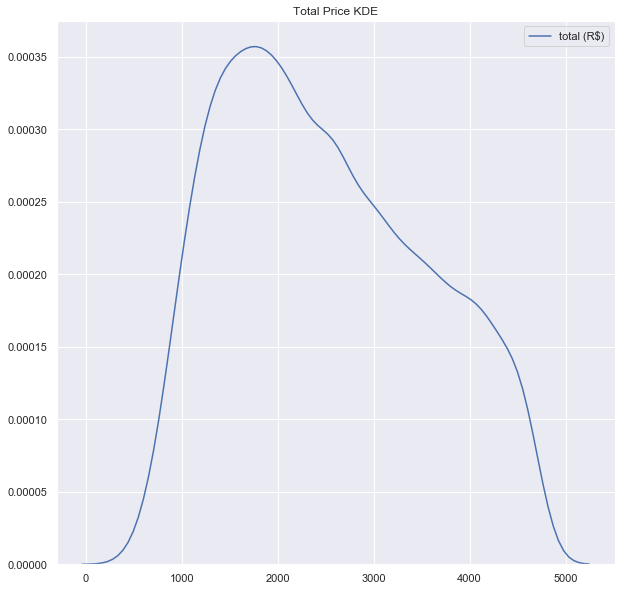

In [40]:
plt.figure(figsize=(10,10))
sns.set()
sns.kdeplot(df_drop_Q['total (R$)'])
plt.title('Total Price KDE')

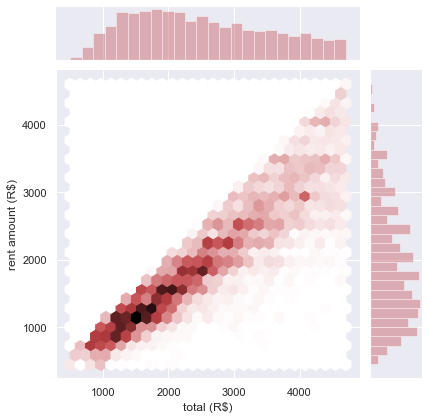

In [41]:
sns.jointplot(df_drop_Q['total (R$)'], df_drop_Q["rent amount (R$)"], kind="hex", color="r")

### Log transformation

In [45]:
df_L = df
features = ['total (R$)']
for item in features:
    c[item] = np.log1p(df[item])

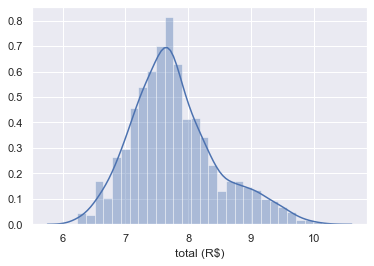

In [81]:
sns.distplot(df_L[df_L["property tax (R$)"]== 0]["total (R$)"])

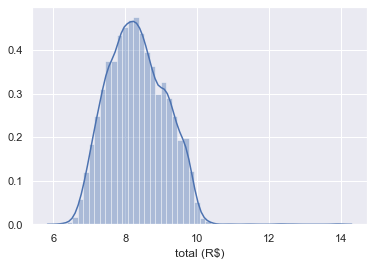

In [82]:
sns.distplot(df_L[df_L["property tax (R$)"]!= 0]["total (R$)"])

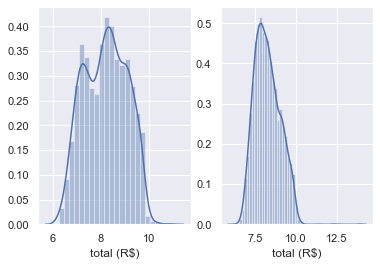

In [86]:
plt.figure()

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
sns.distplot(df_L[df_L["hoa (R$)"]== 0]["total (R$)"], ax = ax1)
sns.distplot(df_L[df_L["hoa (R$)"]!= 0]["total (R$)"], ax = ax2)

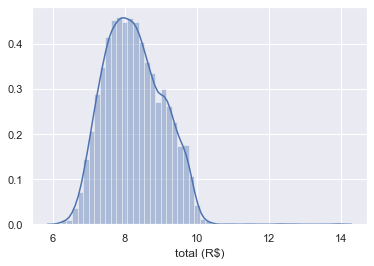

In [46]:
sns.distplot(df_L["total (R$)"])

### Apply ML

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_L.iloc[:,:-1], df_L["total (R$)"],test_size=0.25, shuffle=True)

In [77]:
clf = LinearRegression()
regressor = DecisionTreeRegressor(random_state=0)

In [75]:
cross_validate(clf, df_L[["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)"]], df_L["total (R$)"])

{'fit_time': array([0.01224208, 0.00334501, 0.00346112, 0.003232  , 0.00348496]),
 'score_time': array([0.0022428 , 0.00132585, 0.00134611, 0.00161886, 0.00143409]),
 'test_score': array([0.8412628 , 0.82926507, 0.83729052, 0.59387633, 0.83187403])}

In [78]:
cross_validate(regressor, df_L[["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)"]], df_L["total (R$)"])

{'fit_time': array([0.04991889, 0.03744507, 0.03058624, 0.03062296, 0.03045917]),
 'score_time': array([0.00191903, 0.00148416, 0.00140381, 0.00135994, 0.00138116]),
 'test_score': array([0.99574328, 0.99441549, 0.98971246, 0.98157255, 0.98544155])}